# **Previsão do Nível do Rio com Regressão Linear**
Estudante: Pedro Ryan Coelho Iplinski - BCC (5ª fase)

---



# **Introdução**

Neste trabalho, foi desenvolvido com a linguagem de programação Python, a partir de um dataset com dados sobre o nível do rio e chuvas, um modelo de regressão linear que prevê o nível do rio na cidade de Rio do Sul. A seguir, está o link para acessar o repositório do projeto no GitHub:

https://github.com/pedroryansc/previsaoNivelRio

# **Importação das bibliotecas utilizadas**

In [506]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error
import joblib

# **Leitura do dataset**



In [525]:
niveisRio = pd.read_csv("dados_rio_e_chuva.csv")

# Alteração no nome das colunas do dataset

novasColunas = {
    "NivelRiodoSul" : "nivelRioDoSul",
    "NívelItuporanga" : "nivelItuporanga",
    "ChuvaItuporanaga" : "chuvaItuporanga",
    "NívelTaió" : "nivelTaio",
    "ChuvaTaió" : "chuvaTaio"
}

niveisRio.rename(columns=novasColunas, inplace=True)

In [526]:
niveisRio.head()

,nivelRioDoSul,nivelItuporanga,chuvaItuporanga,nivelTaio,chuvaTaio
0,"170,0","30,0","3,0","98,0","0,0"
1,"170,0","39,0","12,0","98,0","0,0"
2,"169,0","59,0","19,0","98,0","0,0"
3,"169,0","82,0","5,0","98,0","0,0"
4,"169,0","27,0","1,0","97,0","0,0"


In [527]:
niveisRio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65408 entries, 0 to 65407
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nivelRioDoSul    65408 non-null  object
 1   nivelItuporanga  65408 non-null  object
 2   chuvaItuporanga  65408 non-null  object
 3   nivelTaio        65408 non-null  object
 4   chuvaTaio        65408 non-null  object
dtypes: object(5)
memory usage: 2.5+ MB


# **Limpeza e formatação dos dados**

Para garantir a qualidade do dataset para o treinamento do modelo, foi feita a limpeza (e formatação) dos dados, em que foram removidas linhas repetidas e linhas com campos nulos.

In [528]:
# Formatação dos dados
for coluna in niveisRio:
  niveisRio[coluna] = niveisRio[coluna].str.replace(",", ".", regex=False)
  niveisRio[coluna] = pd.to_numeric(niveisRio[coluna], errors="coerce")

# Remoção de linhas repetidas
linhasRepetidas = niveisRio.duplicated().sum()
if(linhasRepetidas > 0):
  niveisRio.drop_duplicates(inplace=True)

# Remoção de linhas com valores nulos
linhasNulas = niveisRio.isnull().any().sum()
if(linhasNulas > 0):
  niveisRio.dropna(inplace=True)

In [529]:
niveisRio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40277 entries, 0 to 65405
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nivelRioDoSul    40277 non-null  float64
 1   nivelItuporanga  40277 non-null  float64
 2   chuvaItuporanga  40277 non-null  float64
 3   nivelTaio        40277 non-null  float64
 4   chuvaTaio        40277 non-null  float64
dtypes: float64(5)
memory usage: 1.8 MB


# **Análise Exploratória**

**Histograma da variável alvo (Nível do rio em Rio do Sul)**

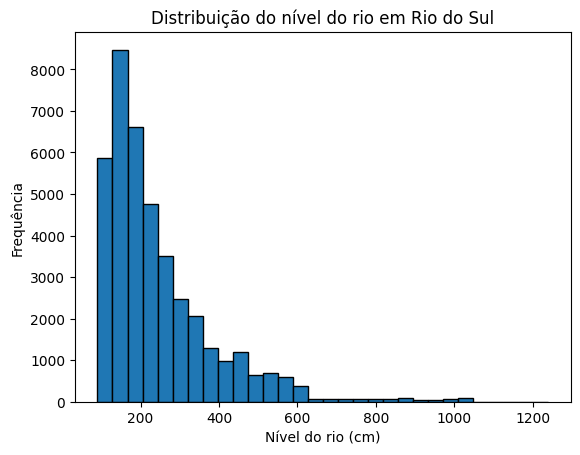

In [530]:
plt.hist(niveisRio["nivelRioDoSul"], bins=30, edgecolor="black")

plt.title("Distribuição do nível do rio em Rio do Sul")
plt.xlabel("Nível do rio (cm)")
plt.ylabel("Frequência")

plt.show()

**Scatter plots (Gráficos de dispersão) entre o nível do rio em Rio do Sul e as outras variáveis**

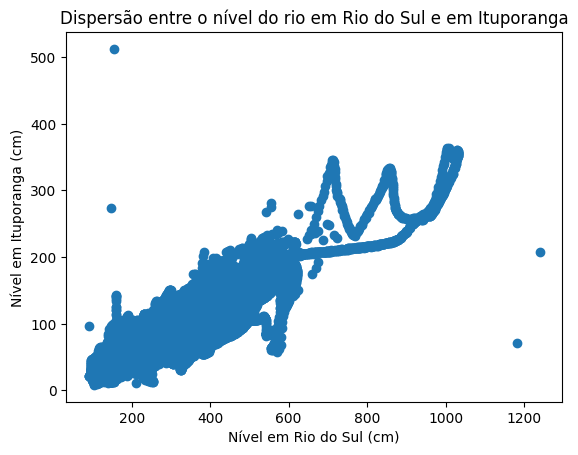

In [552]:
plt.scatter(niveisRio["nivelRioDoSul"], niveisRio["nivelItuporanga"])

plt.title("Relação entre o nível do rio em Rio do Sul e em Ituporanga")
plt.xlabel("Nível em Rio do Sul (cm)")
plt.ylabel("Nível em Ituporanga (cm)")

plt.show()

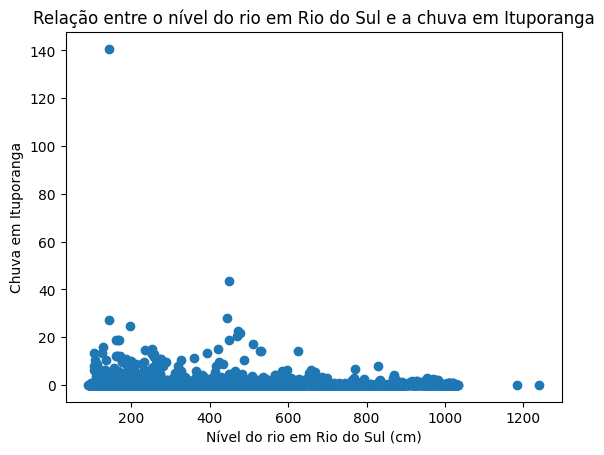

In [560]:
plt.scatter(niveisRio["nivelRioDoSul"], niveisRio["chuvaItuporanga"])

plt.title("Relação entre o nível do rio em Rio do Sul e a chuva em Ituporanga")
plt.xlabel("Nível do rio em Rio do Sul (cm)")
plt.ylabel("Chuva em Ituporanga")

plt.show()

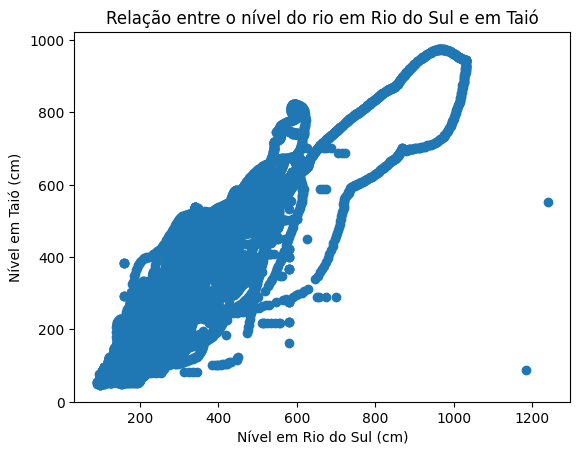

In [561]:
plt.scatter(niveisRio["nivelRioDoSul"], niveisRio["nivelTaio"])

plt.title("Relação entre o nível do rio em Rio do Sul e em Taió")
plt.xlabel("Nível em Rio do Sul (cm)")
plt.ylabel("Nível em Taió (cm)")

plt.show()

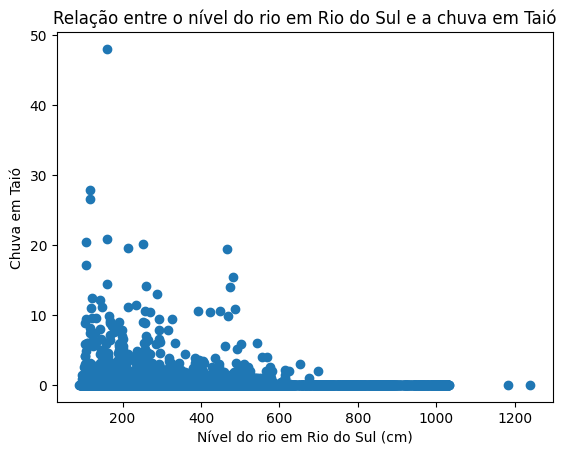

In [562]:
plt.scatter(niveisRio["nivelRioDoSul"], niveisRio["chuvaTaio"])

plt.title("Relação entre o nível do rio em Rio do Sul e a chuva em Taió")
plt.xlabel("Nível do rio em Rio do Sul (cm)")
plt.ylabel("Chuva em Taió")

plt.show()

Como é possível observar nos gráficos de dispersão (principalmente naqueles com o nível do rio em Ituporanga e em Taió), é possível traçar uma reta próxima aos pontos. Podemos utilizar a regressão linear para encontrar a reta com o menor erro de dispersão (ou seja, que se aproxima o máximo possível de todos os pontos), a qual define o modelo de regressão linear e suas previsões.

# **Pré-processamento dos dados**

**Definição das variáveis de entrada e da variável alvo**

In [531]:
x = niveisRio[["nivelItuporanga", "chuvaItuporanga", "nivelTaio", "chuvaTaio"]]
y = niveisRio[["nivelRioDoSul"]]

**Normalização dos dados (MinMax)**

In [532]:
scaler = MinMaxScaler()

In [533]:
x_minmax = scaler.fit_transform(x)

print(x_minmax)

[[0.04365079 0.02133713 0.05597417 0.        ]
 [0.06150794 0.08534851 0.05597417 0.        ]
 [0.10119048 0.13513514 0.05597417 0.        ]
 ...
 [0.12103175 0.         0.10333692 0.        ]
 [0.09126984 0.         0.11410118 0.        ]
 [0.09325397 0.         0.11410118 0.        ]]


**Divisão do dataset em conjuntos de treinamento (70%) e de teste (30%) do modelo**

In [534]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_minmax, y, train_size=0.7, random_state=42)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(28193, 4)
(12084, 4)
(28193, 1)
(12084, 1)


# **Treinamento do modelo de regressão linear**

In [535]:
regressaoLinear = LinearRegression()
regressaoLinear.fit(x_treino, y_treino.values)

nivelRio_previsto = regressaoLinear.predict(x_teste)

**Gráfico de dispersão entre o nível do rio real e o nível previsto pelo modelo**

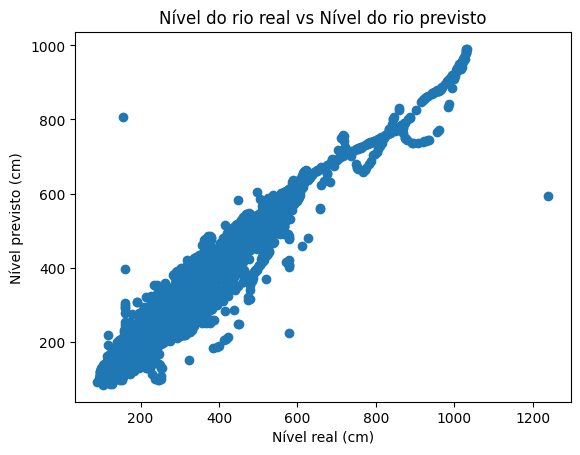

In [536]:
plt.scatter(y_teste, nivelRio_previsto)

plt.title("Nível do rio real vs Nível do rio previsto")
plt.xlabel("Nível real (cm)")
plt.ylabel("Nível previsto (cm)")

plt.show()

# **Avaliação do modelo**

**Coeficiente de Determinação (R²)**

É um valor que representa a qualidade do modelo de regressão linear, variando de 0 a 1. Quanto maior for o valor do coeficiente, melhor é a qualidade das previsões do modelo.

In [537]:
r2_score(y_teste, nivelRio_previsto)

0.9572045748376022

**Raiz do erro quadrático médio (RMSE)**

O RMSE (*Root mean-squared error*) é uma métrica de avaliação usada para medir o desempenho de modelos de regressão. Como indicado pelo seu nome, ela é calculada a partir da raiz quadrada da média dos quadrados dos erros, sendo esses erros a diferença entre o valor previsto pelo modelo e o valor real. Essa métrica pode ser interpretada como o desvio médio das previsões em relação ao alvo. Então, quanto menor o RMSE, melhor é a qualidade do modelo.

In [539]:
root_mean_squared_error(y_teste, nivelRio_previsto)

29.271481502625942

**Erro absoluto médio (MAE)**

O MAE (*Mean Absolute Error*) calcula a média da diferença absoluta entre os valores previstos pelo modelo e os valores observados. Assim como o RMSE, quanto menor o MAE, melhor é o desempenho do modelo.

In [542]:
mean_absolute_error(y_teste, nivelRio_previsto)

18.5489931251188

# **Testando outras combinações de variáveis de entrada para o modelo**

**Nível do rio em Ituporanga e Taió**

In [543]:
x = niveisRio[["nivelItuporanga", "nivelTaio"]]
y = niveisRio[["nivelRioDoSul"]]

# Normalização dos dados
x_minmax = scaler.fit_transform(x)

# Divisão para treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x_minmax, y, train_size=0.7, random_state=42)

# Treinamento do modelo
modelo2 = LinearRegression()
modelo2.fit(x_treino, y_treino.values)

previsao2 = modelo2.predict(x_teste)

r2 = r2_score(y_teste, previsao2)
rmse = root_mean_squared_error(y_teste, previsao2)
mae = mean_absolute_error(y_teste, previsao2)

print(f"R² = {r2}")
print(f"RMSE = {rmse}")
print(f"MAE = {mae}")

R² = 0.9567633930890922
RMSE = 29.421975752944356
MAE = 18.622457762121872


**Nível do rio e chuva em Ituporanga**

In [544]:
x = niveisRio[["nivelItuporanga", "chuvaItuporanga"]]

# Normalização dos dados
x_minmax = scaler.fit_transform(x)

# Divisão para treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x_minmax, y, train_size=0.7, random_state=42)

# Treinamento do modelo
modelo3 = LinearRegression()
modelo3.fit(x_treino, y_treino.values)

previsao3 = modelo3.predict(x_teste)

# Métricas
r2 = r2_score(y_teste, previsao3)
rmse = root_mean_squared_error(y_teste, previsao3)
mae = mean_absolute_error(y_teste, previsao3)

print(f"R² = {r2}")
print(f"RMSE = {rmse}")
print(f"MAE = {mae}")

R² = 0.8168348257525672
RMSE = 60.557436543885494
MAE = 42.87698911046696


**Nível do rio e chuva em Taió**

In [545]:
x = niveisRio[["nivelTaio", "chuvaTaio"]]
y = niveisRio[["nivelRioDoSul"]]

# Normalização dos dados
x_minmax = scaler.fit_transform(x)

# Divisão para treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x_minmax, y, train_size=0.7, random_state=42)

# Treinamento do modelo
modelo4 = LinearRegression()
modelo4.fit(x_treino, y_treino.values)

previsao4 = modelo4.predict(x_teste)

# Métricas
r2 = r2_score(y_teste, previsao4)
rmse = root_mean_squared_error(y_teste, previsao4)
mae = mean_absolute_error(y_teste, previsao4)

print(f"R² = {r2}")
print(f"RMSE = {rmse}")
print(f"MAE = {mae}")

R² = 0.8821789420093944
RMSE = 48.56881305758017
MAE = 30.20250288673184


**Nível do rio em Ituporanga e Taió e chuva em Taió**

In [546]:
x = niveisRio[["nivelItuporanga", "nivelTaio", "chuvaTaio"]]
y = niveisRio[["nivelRioDoSul"]]

# Normalização dos dados
x_minmax = scaler.fit_transform(x)

# Divisão para treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x_minmax, y, train_size=0.7, random_state=42)

# Treinamento do modelo
modelo5 = LinearRegression()
modelo5.fit(x_treino, y_treino.values)

previsao5 = modelo5.predict(x_teste)

# Métricas
r2 = r2_score(y_teste, previsao5)
rmse = root_mean_squared_error(y_teste, previsao5)
mae = mean_absolute_error(y_teste, previsao5)

print(f"R² = {r2}")
print(f"RMSE = {rmse}")
print(f"MAE = {mae}")

R² = 0.9567910562995885
RMSE = 29.412562010809737
MAE = 18.61719628578472


**Nível do rio em Ituporanga e Taió e chuva em Ituporanga**

In [547]:
x = niveisRio[["nivelItuporanga", "chuvaItuporanga", "nivelTaio"]]
y = niveisRio[["nivelRioDoSul"]]

# Normalização dos dados
x_minmax = scaler.fit_transform(x)

# Divisão para treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x_minmax, y, train_size=0.7, random_state=42)

# Treinamento do modelo
modelo6 = LinearRegression()
modelo6.fit(x_treino, y_treino.values)

previsao6 = modelo6.predict(x_teste)

# Métricas
r2 = r2_score(y_teste, previsao6)
rmse = root_mean_squared_error(y_teste, previsao6)
mae = mean_absolute_error(y_teste, previsao6)

print(f"R² = {r2}")
print(f"RMSE = {rmse}")
print(f"MAE = {mae}")

R² = 0.9572025527143672
RMSE = 29.272173046680727
MAE = 18.5452405544829


# **Conclusão da avaliação**

O modelo que apresentou o melhor desempenho foi **o primeiro com todas as variáveis de entrada**. Contudo, alguns modelos ainda apresentaram uma boa qualidade, enquanto outros se aproximaram bastante do desempenho do primeiro modelo, **principalmente o último (modelo 6)**.

Esse último modelo usou como variáveis de entrada o nível do rio em Ituporanga e Taió e a chuva em Ituporanga, sendo que a diferença de seu desempenho com o do melhor modelo é praticamente imperceptível.

# **Salvando o melhor modelo**

In [523]:
joblib.dump(regressaoLinear, "modeloRegressao.joblib")

['modeloRegressao.joblib']

# **Desenvolvimento de uma aplicação**

Por fim, foi desenvolvida uma aplicação *web* que utiliza o modelo de regressão implementado. Ela permite que o usuário informe os dados de entrada e, a partir deles, o modelo faz a previsão do nível do rio em Rio do Sul, a qual é apresentada como saída. Essa aplicação foi feita com a linguagem Python e a biblioteca Streamlit e, para visualizá-la no navegador, é preciso (além de instalar a biblioteca) executar o comando

`streamlit run app.py`

ou, caso não funcione,

`python -m streamlit run app.py`

Porém, ao utilizar a aplicação, é possível observar que as previsões feitas pelo modelo apresentam valores muito altos, ou seja, muito dispersos, apesar de que as métricas que foram calculadas demonstram que o modelo de regressão tem uma ótima qualidade.